# Predicting heart disease using machine learning and various libraries

Appraoches that i need to follow to solve this problem
    *1. Problem Defintion
      2. Data
      3. Evaluation
      4. Features
      5. Modelling
      6. Experimentation
      
  
 Problem Definition: this is a classification problem because we are predicting one thing or the other
 -> giving the individuals clinical records we will predict to see if he/she is expected to have some heart disease or not
 
    Data: the data i will be using came form the UCI machine learning data repository: https://archive.ics.uci.edu/ml/datasets/Heart+Disease/
    irrespective of where the data came from the process is and will be the same
    
    Evluation Process: this is the section we decide if we will proceed with the machine learning project or not: this is the stage we decide the amoount of accuracy we expect to have >95%
    
    Features: stage that will evaluate the different amount of data we have in the dataset: Understanding the dataset

In [125]:
#Preparing the necessary tools

#Regular (Explotary Data Analysis [EDA])
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#want the plot to be inside the notebook
%matplotlib inline


#models form sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


#models evluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import plot_roc_curve

In [126]:
#loading data

df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

# data exploratory: more of understanding the dataset
        # 1. what question am i trying to solve
        # 2. what type of data am i having and how would i treat different types
        #3 . what is missing from the data and how i do fixed it
        # 4.  what are the outliers (Difference of one sample to another) and why should we care about them
        # 5. How can we add, change or remove some features from the dataset

In [127]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [128]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

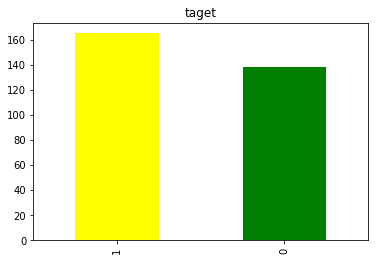

In [129]:
df["target"].value_counts().plot(kind = "bar", color =["Yellow", "green"], title ="taget")

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [131]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#Comparing the Target colum which is the independent column alongside the sex column

In [132]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text xticklabel objects>)

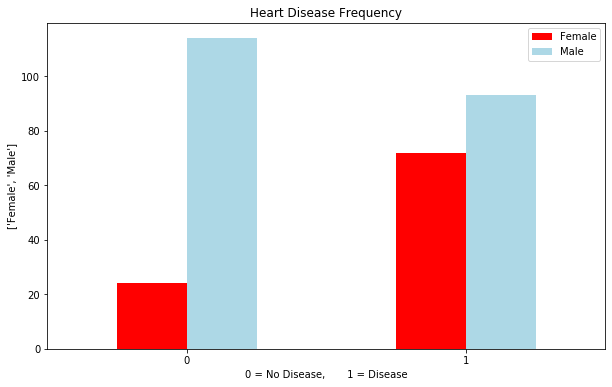

In [133]:
pd.crosstab(df.target, df.sex).plot(kind = "bar", figsize=(10,6), color =["Red", "lightblue"])
plt.title("Heart Disease Frequency")
plt.xlabel("0 = No Disease,       1 = Disease")
plt.ylabel(["Female", "Male"])
plt.legend(["Female","Male"])
plt.xticks(rotation =0)

In [134]:
#Comparing two other columns E.G Age and THalach. thalach is the maximum heart rate achieve

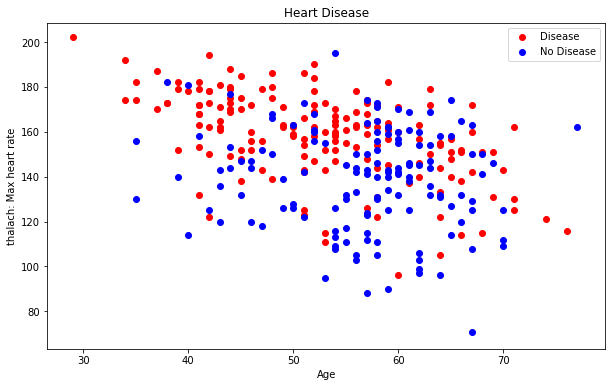

In [135]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target ==1],
           df.thalach[df.target ==1],
            color ="red"
           )

plt.scatter(df.age[df.target ==0],
           df.thalach[df.target ==0],
            color ="blue"
           )

#Adding some necessary guidance
plt.title("Heart Disease")
plt.xlabel("Age")
plt.ylabel("thalach: Max heart rate")
plt.legend(["Disease","No Disease"])

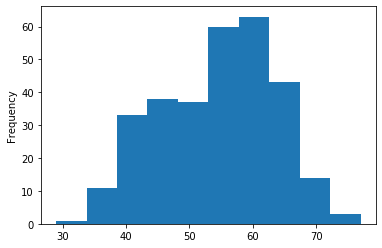

In [136]:
df.age.plot.hist()

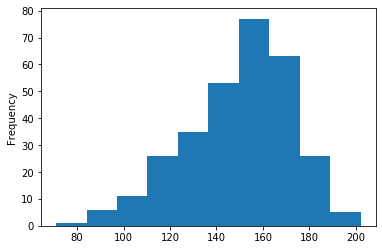

In [137]:
df.thalach.plot.hist()

##Comparing the heart disease frequency per chest pain type
    cp: chest pain type
-- Value 1: typical angina: is a type of chest pain caused by reduced blood flow to the heart
-- Value 2: atypical angina: When one experiences chest pain that doesn't meet the criteria for angina, it's known as atypical chest pain
-- Value 3: non-anginal pain: Non-cardiac chest pain (NCCP) is a term used to describe chest pain that resembles heart pain
-- Value 4: asymptomatic: 

In [138]:
pd.crosstab(df.cp, df.target )

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

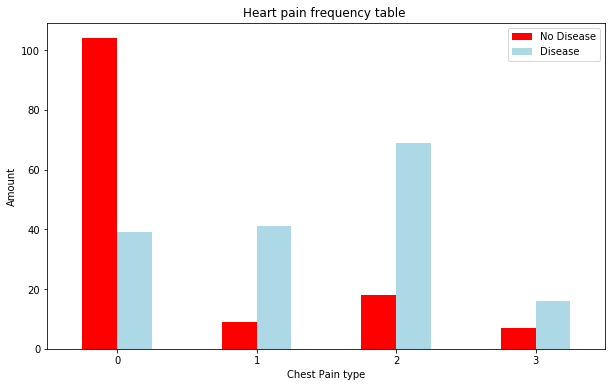

In [139]:
##adding some visuals to the check pain attribute
pd.crosstab(df.cp, df.target).plot(kind = "bar", figsize =(10,6),
                                  color =["red", "lightblue"])

plt.title("Heart pain frequency table ")
plt.xlabel("Chest Pain type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation =0)

In [140]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [141]:
##correlation: simple means the difference between the features in your dataset: comparing the columns next to eachother
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


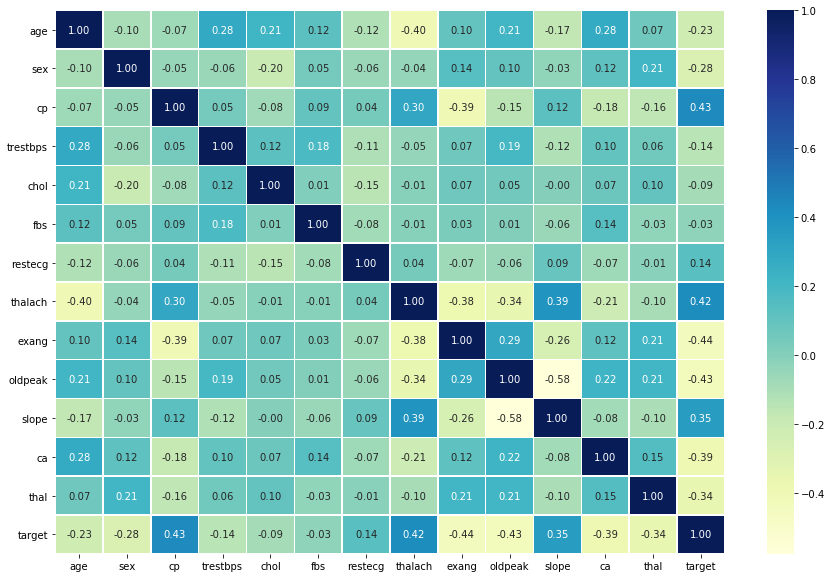

In [142]:
#visualizing the correlaiton
corr_matrix = df.corr()
fig, ax =plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f",cmap="YlGnBu")

# modelling

In [143]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [144]:
##spliting the data into x and y
X = df.drop("target", axis =1)
y = df["target"]

In [145]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [146]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [147]:
##spliting the data into train and test split
np.random.seed(42)

#spliting and testing
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size =0.2) 

In [148]:
len(X_train)

242

In [149]:
len(y_train)

242

##Now that the data is been train and segregated into train and test. 
##I Will now be looking for the best possible machine learning algorithm to solve this problem

##I will be trying three possible machine learning algorithm
        `KNearest Neighbor Classifiers`
     ` Random Forest Classifiers`
     ` Logistic Regression`

# putting the models in a dictionary


In [161]:

models = {"Logistic Regression": LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}
#creating a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    """
    fitting and evaluating the given machine learning models
    models: a dictionary of different machine learning scikitlearn model
    X_train: training data (no labels included)
    X_test: testing data (no labels included)
    y_train: training data
    y_test: testing labels
    """
    np.random.seed(42)
    #creating a dictionary to keep the model scores
    model_scores ={}
    #looping through the ML models
    for name, model in models.items():
        #fitting the model
        model.fit(X_train, y_train)
        #evaluating the models
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


In [162]:
model_scores =  fit_and_score(models=models,
                             X_train= X_train,
                             X_test = X_test,
                              y_train = y_train,
                              y_test = y_test
                             )
model_scores

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Model Comparison

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

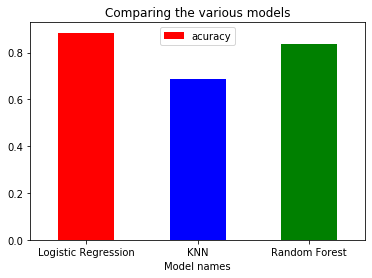

In [181]:
model_compare = pd.DataFrame(model_scores, index=["acuracy"])
model_compare.T.plot.bar(color  = ("Red","Blue","green"));
plt.title("Comparing the various models")
plt.xlabel("Model names")
plt.xticks(rotation =0)


# Hyperparameter Tuning

In [196]:
#tuning kNN
train_scores =[]
test_scores =[]
#creating a list various n_neighbors
neighbors = range(1, 21)

#setting up KNN
knn = KNeighborsClassifier()

#looping through different neighbors
for i in neighbors:
    knn.set_params(n_neighbors =i)
    
    #fitting the algorithm
    knn.fit(X_train, y_train)
    
    #updating the socres
    train_scores.append(knn.score(X_train, y_train))
    #updating the test score list
    test_scores.append(knn.score(X_test, y_test))


[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [201]:
train_score

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [197]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41


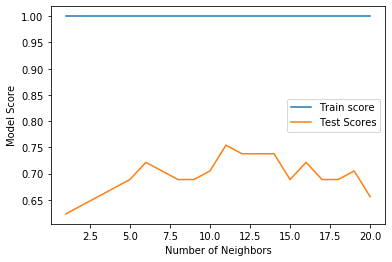

In [203]:
plt.plot(neighbors, train_score, label = "Train score")
plt.plot(neighbors, test_scores, label = "Test Scores")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}")

In [205]:
# Hyperparamater tunining GridSearchCV
    #we will be using the GridSerarch Cv to predict our logistic Regression

In [210]:
log_reg_grid= {"C":np.logspace(-4, 4,30),
              "solver":["liblinear"]}
#setup grid hyperparamater
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv= 5,
                          verbose=True)
#fit the model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished


In [211]:
#checking the  best params
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [212]:
#evaluate the grid search
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating the trained machine learning classifier beyond accuracy 
        USING THE FOLLOWING MODEL PREIDCTIONS
        
    1. `ROC`curve and `AUC` curve
    2. Confusioin matri
    3. classification report
    4.  f-1 score
    5. recall
    6. precision

#### Maing prediction with out tunes model

In [213]:
y_preds = gs_log_reg.predict(X_test)

In [214]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [215]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

ploting the ROC curve: this models helps us to predict the
   

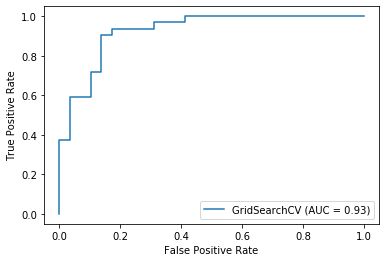

In [218]:
plot_roc_curve(gs_log_reg, X_test, y_test)

### Confusion matrix

In [235]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


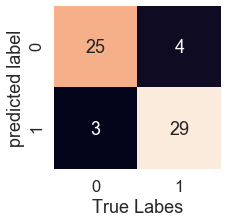

In [237]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    """
        ploting a graph that will be easily visualize
    """
    fig , ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot= True,
                    cbar=False)
    plt.xlabel("True Labes")
    plt.ylabel("predicted label" )
plot_conf_mat(y_test, y_preds)